In [1]:
# workclass:政府、軍隊、私人
# fnlwgt:人口普查員ID
# education:教育水平
# education_num:education轉數字
# marital_status:婚姻狀況
# occupation:工作類型
# relationship:家庭
# race:種族
# capital_gain:資本利益
# capital_loss:資本損失
# hours_per_week:一週工時
# native_country:國籍
# income:收入範圍

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
col=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
path = './adult.data'
df = pd.read_csv(path, header=None, sep=',\s')
df.columns=col

path2 = './adult.test'
df2 = pd.read_csv(path2, header=None, sep=',\s')
df2.columns=col

c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
#workclass, occupation, native_country have " ?" value
#iloc[:,[1,6,13]]
df=df.replace(to_replace=r'^ ?.$', value=np.nan, regex=True)
df2=df2.replace(to_replace=r'^ ?.$', value=np.nan, regex=True)

# Fill NaN Value

In [7]:
df.loc[((df.workclass.isnull().astype(int) + df.occupation.isnull().astype(int)) == 1),['workclass','occupation']]

,workclass,occupation
5361,Never-worked,NaN
10845,Never-worked,NaN
14772,Never-worked,NaN
20337,Never-worked,NaN
23232,Never-worked,NaN
32304,Never-worked,NaN
32314,Never-worked,NaN


In [8]:
df[df['workclass']=='Never-worked']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [9]:
df2[df2['workclass']=='Never-worked']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
8785,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K.
11607,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K.
13898,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K.


In [10]:
#沒工作所以沒有工作類型
df.loc[df.workclass == 'Never-worked',['occupation']] = 'None'
df2.loc[df2.workclass == 'Never-worked',['occupation']] = 'None'

In [11]:
#研究生沒工作所以沒有工作和工作類型
index=df[(df['occupation'].isnull()) & (df['age']<=24) & (df['education_num']<=11)].index
index2=df2[(df2['occupation'].isnull()) & (df2['age']<=24) & (df2['education_num']<=11)].index
df['workclass'].iloc[index]='Never-worked'
df['occupation'].iloc[index]='Student'
df2['workclass'].iloc[index2]='Never-worked'
df2['occupation'].iloc[index2]='Student'

c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
index=df[(df['occupation'].isnull()) & (df['age']>=60) & (df['hours_per_week']<50)].index
index2=df2[(df2['occupation'].isnull()) & (df2['age']>=60) & (df2['hours_per_week']<50)].index

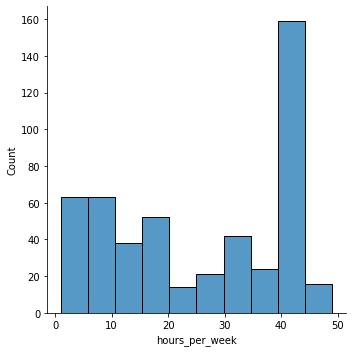

In [13]:
sns.displot(df.iloc[index]['hours_per_week'])

In [14]:
index=df[(df['occupation'].isnull()) & (df['age']>=60) & (df['hours_per_week']<40)].index
index2=df2[(df2['occupation'].isnull()) & (df2['age']>=60) & (df2['hours_per_week']<40)].index

In [15]:
#找出年紀大且一週工時最多者，把小於正常工時的人設為退休
df['workclass'].iloc[index]='Retired'
df['occupation'].iloc[index]='Retired'
df2['workclass'].iloc[index2]='Retired'
df2['occupation'].iloc[index2]='Retired'

c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [16]:
df=df.dropna()
df2=df2.dropna()

In [17]:
labelencoder = LabelEncoder()
df['workclass'] = labelencoder.fit_transform(df['workclass'])
df['marital_status'] = labelencoder.fit_transform(df['marital_status'])
df['occupation'] = labelencoder.fit_transform(df['occupation'])
df['relationship'] = labelencoder.fit_transform(df['relationship'])
df['race'] = labelencoder.fit_transform(df['race'])
df['sex'] = labelencoder.fit_transform(df['sex'])
df['native_country'] = labelencoder.fit_transform(df['native_country'])
df['income'] = labelencoder.fit_transform(df['income'])
y_train=df['income']
df.drop(columns=['fnlwgt','education','income'],inplace=True)
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,7,13,4,0,1,4,1,2174,0,40,38
1,50,6,13,2,3,0,4,1,0,0,13,38
2,38,3,9,0,5,1,4,1,0,0,40,38
3,53,3,7,2,5,0,2,1,0,0,40,38
4,28,3,13,2,10,5,2,0,0,0,40,4


In [18]:
df2['workclass'] = labelencoder.fit_transform(df2['workclass'])
df2['marital_status'] = labelencoder.fit_transform(df2['marital_status'])
df2['occupation'] = labelencoder.fit_transform(df2['occupation'])
df2['relationship'] = labelencoder.fit_transform(df2['relationship'])
df2['race'] = labelencoder.fit_transform(df2['race'])
df2['sex'] = labelencoder.fit_transform(df2['sex'])
df2['native_country'] = labelencoder.fit_transform(df2['native_country'])
df2['income'] = labelencoder.fit_transform(df2['income'])
y_test=df2['income']
df2.drop(columns=['fnlwgt','education','income'],inplace=True)
df2.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,3,7,4,6,3,2,1,0,0,40,37
1,38,3,9,2,4,0,4,1,0,0,50,37
2,28,1,12,2,11,0,4,1,0,0,40,37
3,44,3,10,2,6,0,2,1,7688,0,40,37
4,18,2,10,4,14,3,4,0,0,0,30,37


In [19]:
df.drop(columns=['occupation','workclass','native_country'],inplace=True)
df2.drop(columns=['occupation','workclass','native_country'],inplace=True)

# Entropy & Gini

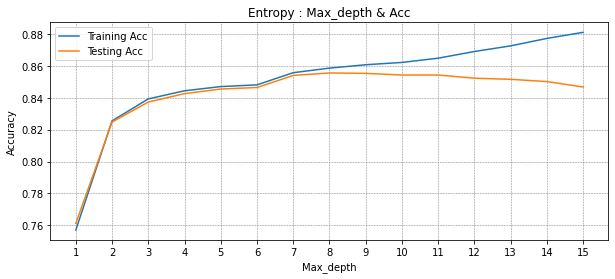

In [20]:
max_depth_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

train_acc = [] # Log training errors for each model
test_acc = [] # Log testing errors for each model

for x in max_depth_list:
    dtc = DecisionTreeClassifier(criterion='entropy',max_depth=x) 
    dtc.fit(df,y_train)
    train_z = dtc.predict(df)
    test_z = dtc.predict(df2)
    train_acc.append(metrics.accuracy_score(y_train, train_z))
    test_acc.append(metrics.accuracy_score(y_test, test_z))

x = np.arange(len(max_depth_list)) + 1 # Create domain for plot
plt.figure(figsize=(10,4))
plt.xticks(range(16))  # 設定x刻度
plt.title('Entropy : Max_depth & Acc')
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.plot(x, train_acc, label='Training Acc') # Plot training error over domain
plt.plot(x, test_acc, label='Testing Acc') # Plot testing error over domain
plt.xlabel('Max_depth') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend(loc = 'upper left')
plt.show()

In [21]:
connect={"Entropy_Train_Acc": train_acc, "Entropy_Test_Acc": test_acc}
pd.DataFrame(connect,index=list(range(1,16)))

,Entropy_Train_Acc,Entropy_Test_Acc
1,0.757046,0.761189
2,0.825515,0.824825
3,0.839318,0.837347
4,0.844402,0.842612
5,0.847040,0.845502
6,0.848134,0.846465
7,0.855759,0.854042
8,0.858623,0.855583
9,0.860746,0.855327
10,0.862194,0.854299


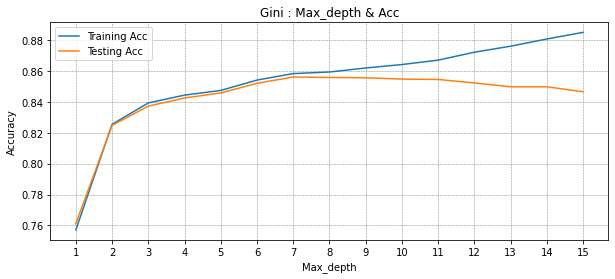

In [22]:
max_depth_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

train_acc = [] # Log training errors for each model
test_acc = [] # Log testing errors for each model

for x in max_depth_list:
    dtc = DecisionTreeClassifier(criterion='gini',max_depth=x) 
    dtc.fit(df,y_train)
    train_z = dtc.predict(df)
    test_z = dtc.predict(df2)
    train_acc.append(metrics.accuracy_score(y_train, train_z))
    test_acc.append(metrics.accuracy_score(y_test, test_z))

x = np.arange(len(max_depth_list)) + 1 # Create domain for plot
plt.figure(figsize=(10,4))
plt.xticks(range(16))  # 設定x刻度
plt.title('Gini : Max_depth & Acc')
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.plot(x, train_acc, label='Training Acc') # Plot training error over domain
plt.plot(x, test_acc, label='Testing Acc') # Plot testing error over domain
plt.xlabel('Max_depth') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend(loc = 'upper left')
plt.show()

In [23]:
connect={"Gini_Train_Acc": train_acc, "Gini_Test_Acc": test_acc}
pd.DataFrame(connect,index=list(range(1,16)))

,Gini_Train_Acc,Gini_Test_Acc
1,0.757046,0.761189
2,0.825515,0.824825
3,0.839414,0.837347
4,0.844466,0.842612
5,0.847523,0.845887
6,0.854215,0.852116
7,0.858430,0.856226
8,0.859459,0.855904
9,0.862066,0.855712
10,0.864286,0.854877


# Model

In [24]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=7)
clf.fit(df,y_train) #(X_scaled,y_train)

DecisionTreeClassifier(max_depth=7)

In [25]:
x_predict=clf.predict(df2)
x_acc=metrics.accuracy_score(y_train,clf.predict(df))
x_acc2=metrics.accuracy_score(y_test,clf.predict(df2))
print("Train Score:",x_acc)
print("Test Score :",x_acc2)

Train Score: 0.8584298584298584
Test Score : 0.8561613048224491


In [26]:
import pydotplus
import os
from sklearn.tree import export_graphviz

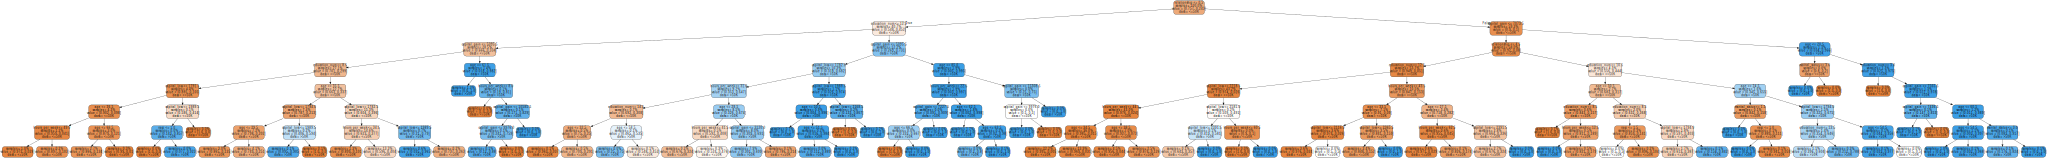

In [27]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\\bin'
#視覺化
dot_data = export_graphviz(clf, out_file=None, label='all', impurity=False, proportion=True, feature_names=df.columns, class_names=['<=50K', '>50K'],filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph